In [2]:
import numpy as np
import numpy.random as rn
import cv2
from matplotlib import pyplot as plt
import os, fnmatch
import math
from matplotlib import animation, rc
from IPython.display import HTML


In [3]:
%matplotlib inline


## Problem 2. Solitary wave propagation and grid effects

In [4]:
a = np.loadtxt('flat_results/flat2/eta1',unpack=True)


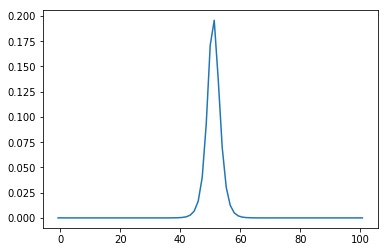

In [5]:
plt.plot(a[0], a[1])


In [10]:
for i in np.arange(6,72,5):
    num = str(i)
    a = np.loadtxt('flat_results/flat/eta'+num,unpack=True)
    plt.plot(a[0], a[1])
    

OSError: flat_results/flat/eta6 not found.

with a $\Delta x = 2$ we get dispersion

In [7]:
a = np.loadtxt('flat_results/flat1/eta0',unpack=True)



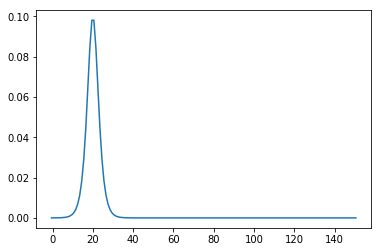

In [8]:
plt.plot(a[0],a[1])



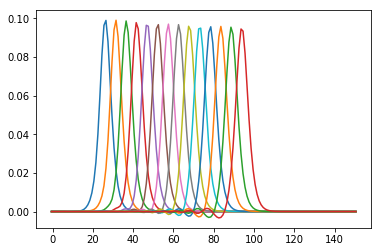

In [9]:
for i in np.arange(6,72,5):
    num = str(i)
    a = np.loadtxt('flat_results/flat1/eta'+num,unpack=True)
    plt.plot(a[0], a[1])
    

with a $\Delta x = 1$ the disperison is less

In [11]:
a = np.loadtxt('flat_results/flathf/eta0',unpack=True)


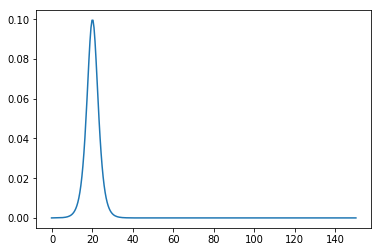

In [12]:
plt.plot(a[0],a[1])


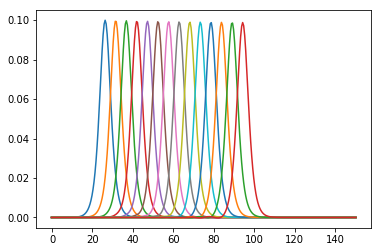

In [13]:
for i in np.arange(6,72,5):
    num = str(i)
    a = np.loadtxt('flat_results/flathf/eta'+num,unpack=True)
    plt.plot(a[0], a[1])
    

with $\Delta x = 0.5$ the dispesion has almost disappeared. The reason it is because the dispersion in the numeric equations is proportional to $k\Delta x$.
$\sin(\alpha) \approx \alpha$ for small $\alpha$

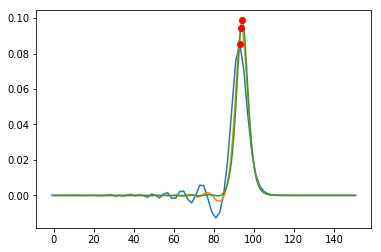

In [14]:
num = '71'

a = np.loadtxt('flat_results/flat2/eta'+num,unpack=True)
b = np.loadtxt('flat_results/flat1/eta'+num,unpack=True)
c = np.loadtxt('flat_results/flathf/eta'+num,unpack=True)

plt.plot(a[0], a[1],b[0], b[1],c[0], c[1])

max1 = max(a[1])
max2 = max(b[1])
max3 = max(c[1])
a1 = [i for i, j in enumerate(a[1]) if j == max1]
b1 = [i for i, j in enumerate(b[1]) if j == max2]
c1 = [i for i, j in enumerate(c[1]) if j == max3]
plt.plot(a[0][a1[0]],max1,'ro',b[0][b1[0]],max2,'ro',c[0][c1[0]],max3,'ro')



The maximum in $\eta$ of each solution changes because of the dispesion, the larger the dispersion the lower the maximum in $\eta$. It is consequece of the mass/momentum conservation.

## Problem 3. Numerical instability

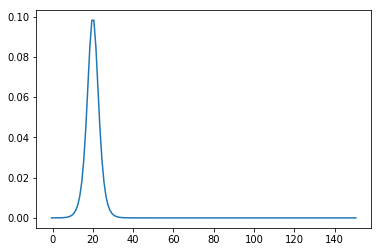

In [15]:
alpha = 0.1
x0 = 20

def sech2(x):
    return 1/(np.cosh(x))**2

argum = 0.5*np.sqrt(0.3)*(b[0]-20)
ola = 0.1*sech2(argum)
plt.plot(b[0],ola)



In [362]:
a = np.loadtxt('flat_results/lsw3/eta0',unpack=True)


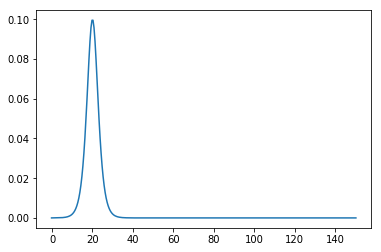

In [363]:
plt.plot(a[0],a[1])


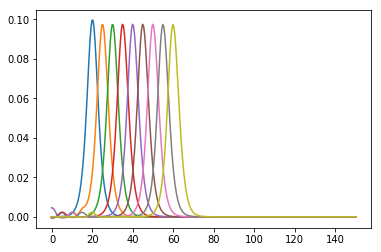

In [350]:
for i in np.arange(0,41,5):
    num = str(i)
    a = np.loadtxt('flat_results/lsw3/eta'+num,unpack=True)
    plt.plot(a[0], a[1])
    

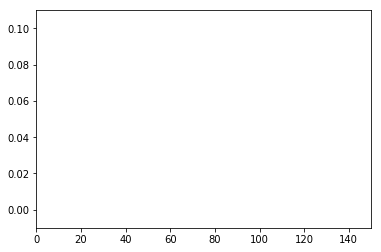

In [353]:
fig, ax = plt.subplots()

ax.set_xlim(( -0.05, 150))
ax.set_ylim((-0.01, 0.11))

line, = ax.plot([], [], lw=2)

In [354]:
def animate(i):
    num = str(i)
    a = np.loadtxt('flat_results/lsw3/eta'+num,unpack=True)
    line.set_data(a[0], a[1])
    return (line,)

In [355]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=np.arange(0,41,5),init_func=init, interval=150, blit=False)
HTML(anim.to_html5_video())

the initial condition is a solitary wave, i.e., a solution of non-linear and dispesrive equations like Bousinesq...  And the LSW can take any initial condition even if it is not a solution, and it will split the solution in two. Tha is what we se here.

## Problem 4. Wave dispersion

Make the derivative and the expansion to see the leading order

In [108]:
def eta(x,x0,lam):
    A = 0.1
    dif = x-x0
    fun = np.zeros(len(x))
    for i in range(len(x)):
        if -0.5*lam < dif[i] < 0.5*lam:
            fun[i] = 2*A*np.cos(np.pi*dif[i]/lam)**2
    return fun

In [343]:
a = np.loadtxt('flat_results/flat1/eta0',unpack=True)


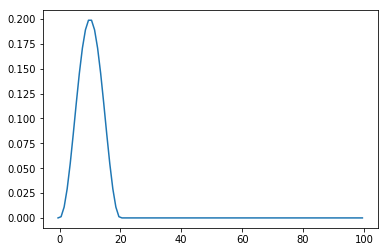

In [344]:
ola = eta(a[0]-10,0,20)
cosa =a[0]
plt.plot(cosa[0:101],ola[0:101])


In [345]:
arc = open('flat_results/cosine/eta.in','w')
np.savetxt(arc,np.c_[cosa[0:101],ola[0:101]])
arc.close()


In [346]:
h = np.ones(101)
arc = open('flat_results/cosine/h','w')
np.savetxt(arc,np.c_[cosa[0:101],h])
arc.close()


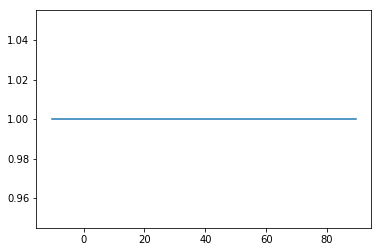

In [177]:
a = np.loadtxt('flat_results/cosine/h',unpack=True)
plt.plot(a[0],a[1])


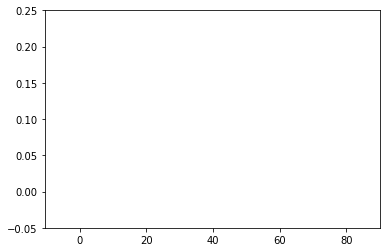

In [204]:
fig, ax = plt.subplots()

ax.set_xlim(( -10.5, 90))
ax.set_ylim((-0.05, 0.25))

line, = ax.plot([], [], lw=2)


In [205]:
def init():
    line.set_data([], [])
    return (line,)


In [380]:
def animate(i):
    num = str(i)
    a = np.loadtxt('flat_results/cosine/eta'+num,unpack=True)
    line.set_data(a[0], a[1])
    return (line,)


In [381]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=np.arange(0,81,5),init_func=init, interval=150, blit=False)
HTML(anim.to_html5_video())


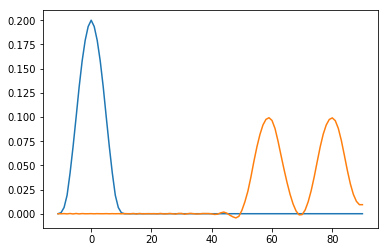

In [182]:
a = np.loadtxt('flat_results/cosine/eta0',unpack=True)
plt.plot(a[0], a[1])
b = np.loadtxt('flat_results/cosine/eta80',unpack=True)
plt.plot(b[0], b[1])


In [208]:
def animate(i):
    num = str(i)
    a = np.loadtxt('flat_results/cosine200/eta'+num,unpack=True)
    line.set_data(a[0], a[1])
    return (line,)


In [209]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=np.arange(0,81,5),init_func=init, interval=150, blit=False)
HTML(anim.to_html5_video())



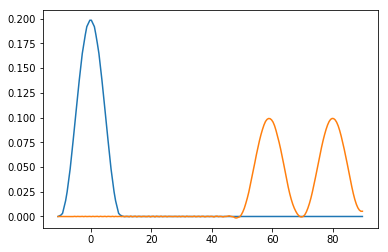

In [184]:
a = np.loadtxt('flat_results/cosine200/eta0',unpack=True)
plt.plot(a[0], a[1])
b = np.loadtxt('flat_results/cosine200/eta80',unpack=True)
plt.plot(b[0], b[1])


In [301]:
def animate(i):
    num = str(i)
    a = np.loadtxt('flat_results/cosine400/eta'+num,unpack=True)
    line.set_data(a[0], a[1])
    return (line,)


In [302]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=np.arange(0,81,5),init_func=init, interval=150, blit=False)
HTML(anim.to_html5_video())


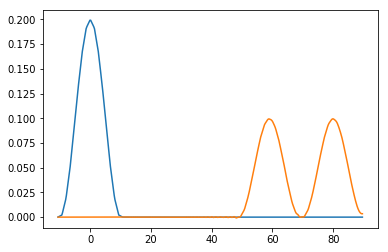

In [303]:
a = np.loadtxt('flat_results/cosine400/eta0',unpack=True)
plt.plot(a[0], a[1])
b = np.loadtxt('flat_results/cosine400/eta80',unpack=True)
plt.plot(b[0], b[1])


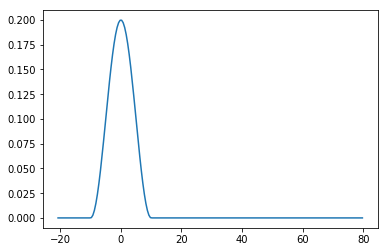

In [196]:
ola = eta(a[0]-10,0,20)
cosa =a[0]-10
plt.plot(cosa,ola)

In [197]:
arc = open('flat_results/cosine_move/eta.in','w')
np.savetxt(arc,np.c_[cosa,ola])
arc.close()

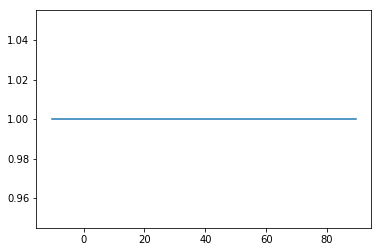

In [198]:
a = np.loadtxt('flat_results/cosinet/h',unpack=True)
plt.plot(a[0],a[1])

In [201]:
arc = open('flat_results/cosine_move/h','w')
np.savetxt(arc,np.c_[cosa[0:-1],a[1]])
arc.close()

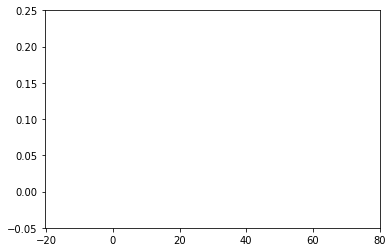

In [304]:
fig, ax = plt.subplots()

ax.set_xlim(( -20.5, 80))
ax.set_ylim((-0.05, 0.25))

line, = ax.plot([], [], lw=2)


In [308]:
def animate(i):
    num = str(i)
    a = np.loadtxt('flat_results/cosine_move/eta'+num,unpack=True)
    line.set_data(a[0], a[1])
    return (line,)


In [309]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=np.arange(0,81,5),init_func=init, interval=150, blit=False)
HTML(anim.to_html5_video())


It is the two waves spliting. there is dipersion with a non fine grid, when $\Delta x $

### b)  Linearized Boussinesq

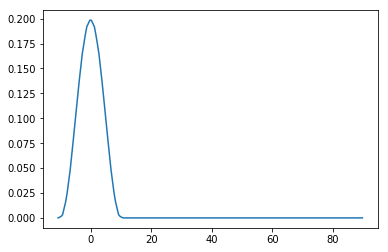

In [307]:
a = np.loadtxt('flat_results/lbous/eta0',unpack=True)
plt.plot(a[0],a[1])

In [310]:
def animate(i):
    num = str(i)
    a = np.loadtxt('flat_results/lbous/eta'+num,unpack=True)
    line.set_data(a[0], a[1])
    return (line,)

In [311]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=np.arange(0,81,5),init_func=init, interval=150, blit=False)
HTML(anim.to_html5_video())

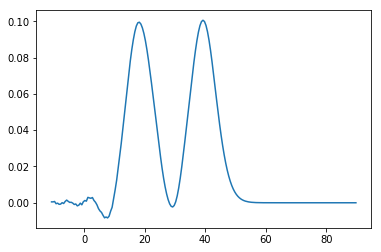

In [226]:
a = np.loadtxt('flat_results/lbous/eta80',unpack=True)
plt.plot(a[0],a[1])

It is the physical disperion visible. 

### c)

In [312]:
def animate(i):
    num = str(i)
    a = np.loadtxt('flat_results/fbous/eta'+num,unpack=True)
    line.set_data(a[0], a[1])
    return (line,)

In [313]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=np.arange(0,81,5),init_func=init, interval=150, blit=False)
HTML(anim.to_html5_video())

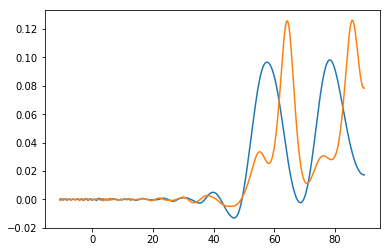

In [314]:
a = np.loadtxt('flat_results/lbous/eta80',unpack=True)
plt.plot(a[0],a[1])
b = np.loadtxt('flat_results/fbous/eta80',unpack=True)
plt.plot(b[0],b[1])

Also dispersive but this one change shape due to the nonlinearities.

In [315]:
def animate(i):
    num = str(i)
    a = np.loadtxt('flat_results/nlsw4-1/eta'+num,unpack=True)
    line.set_data(a[0], a[1])
    return (line,)

In [316]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=np.arange(0,81,5),init_func=init, interval=150, blit=False)
HTML(anim.to_html5_video())

this equation ar just nonlinear, without dispersion. these ripples are conseuence of the nonlinearity and the appear with the differener grid resolutions, so they are not artifacts.

In [317]:
def animate(i):
    num = str(i)
    a = np.loadtxt('flat_results/nlsw4d2/eta'+num,unpack=True)
    line.set_data(a[0], a[1])
    return (line,)

In [318]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=np.arange(0,81,5),init_func=init, interval=150, blit=False)
HTML(anim.to_html5_video())

It is steepening. 

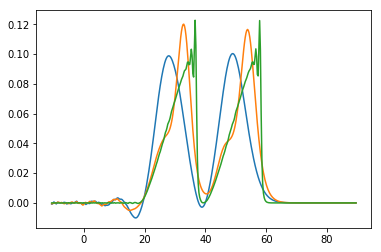

In [366]:
a = np.loadtxt('flat_results/lbous/eta50',unpack=True)
plt.plot(a[0],a[1])
b = np.loadtxt('flat_results/fbous/eta50',unpack=True)
plt.plot(b[0],b[1])
c = np.loadtxt('flat_results/nlsw4-1/eta50',unpack=True)
plt.plot(c[0],c[1])

the back part of the wave moves faster than the front, then the wave steepens. When the equation considers the nonlinearities this present on the solution.  If the dispesion is out of the picture, then nonlinear effects are present in the crets of the wave. When there is dispersion also, the shape of the wave is more flat and the wave never steepens

The dispersive effect makes the front wave flatter with time, and the non-linear effect makes the front wave steeper. Considering the full Boussinesq equations, the dispersive effect weakens the non-linear effect at the leading wavefront. So the artifact would happen at a later time?

## Problem 5 . Bores

### a)

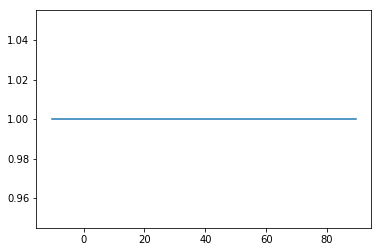

In [236]:
a = np.loadtxt('flat_results/lbous/h',unpack=True)
plt.plot(a[0],a[1])

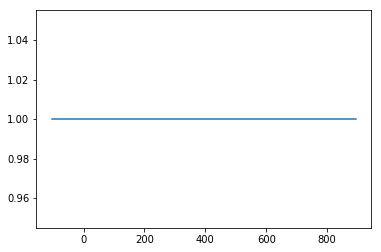

In [237]:
plt.plot(10*a[0],a[1])

In [238]:
arc = open('flat_results/bores-nl/h','w')
np.savetxt(arc,np.c_[10*a[0],a[1]])
arc.close()

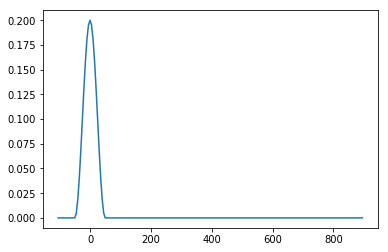

In [239]:
ola = eta(10*a[0],0,100)
cosa =10*a[0]
plt.plot(cosa,ola)

In [240]:
arc = open('flat_results/bores-nl/eta.in','w')
np.savetxt(arc,np.c_[cosa,ola])
arc.close()

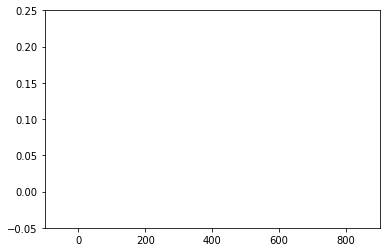

In [371]:
fig, ax = plt.subplots()

ax.set_xlim(( -100.5, 900))
ax.set_ylim((-0.05, 0.25))

line, = ax.plot([], [], lw=2)

In [391]:
def animate(i): #(i,path)
    num = str(i)
    a = np.loadtxt('flat_results/bores-nl/eta'+num,unpack=True)
    line.set_data(a[0], a[1])
    #line.set_label('time %d'%(i))
    #legend=plt.legend()
    return (line,)


#line.set_label('line %d, stage %d'%(j,i))
 #   legend.remove()
  #  legend = plt.legend()
   # return lines + [legend]

In [392]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=np.arange(5,205,10),init_func=init, interval=150, blit=False)
HTML(anim.to_html5_video())

In [374]:
def animate(i):
    num = str(i)
    a = np.loadtxt('flat_results/bores-bous/eta'+num,unpack=True)
    line.set_data(a[0], a[1])
    return (line,)

In [376]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=np.arange(5,205,10),init_func=init, interval=150, blit=False)
HTML(anim.to_html5_video())

(-0.01, 0.15)

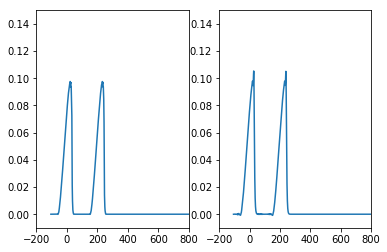

In [389]:
a = np.loadtxt('flat_results/bores-nl/eta205',unpack=True)
plt.subplot(1,2,1)
plt.plot(a[0],a[1])
plt.xlim(-200,800)
plt.ylim(-0.01,0.15)
b = np.loadtxt('flat_results/bores-bous/eta205',unpack=True)
plt.subplot(1,2,2)
plt.plot(b[0],b[1])
plt.xlim(-200,800)
plt.ylim(-0.01,0.15)

### b)

In [328]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=np.arange(205,800,10),init_func=init, interval=150, blit=False)
HTML(anim.to_html5_video())

### c)

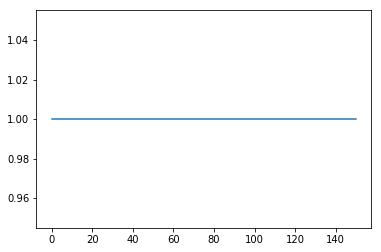

In [267]:
a = np.loadtxt('flat_results/flat1/h',unpack=True)
plt.plot(a[0],a[1])

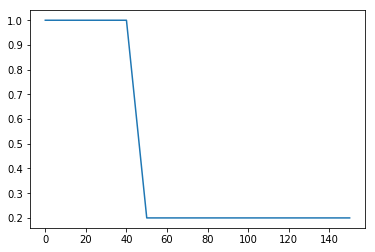

In [273]:
h = np.zeros(len(a[0]))
for i in range(len(h)):
    if a[0][i]<40:
        h[i] = 1.
    elif a[0][i]<50:
        h[i] = 4.2-0.08*(a[0][i])
    elif a[0][i] <= 150:
        h[i] = 0.2
plt.plot(a[0],h)

In [274]:
arc = open('flat_results/bores-c/h','w')
np.savetxt(arc,np.c_[a[0],h])
arc.close()

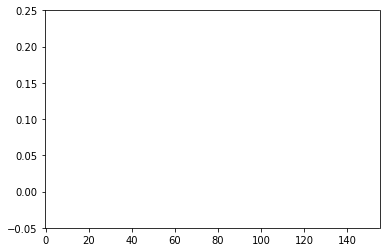

In [329]:
fig, ax = plt.subplots()

ax.set_xlim(( -0.5, 155))
ax.set_ylim((-0.05, 0.25))

line, = ax.plot([], [], lw=2)

In [330]:
def animate(i):
    num = str(i)
    a = np.loadtxt('flat_results/bores-c/eta'+num,unpack=True)
    line.set_data(a[0], a[1])
    return (line,)

In [331]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=np.arange(0,201,5),init_func=init, interval=150, blit=False)
HTML(anim.to_html5_video())

We have a solitary wave moving in one direction with constant depth. When it reaches the slope, the wave becomes like an intial condition similar to the previous exercise. As a consequence, it splits in two (these waves are not longer solitary waves). The non-linearities appears again in the front of the wave. The dispersion also appears with the slope. when the depth is constant again then the wavefront remains the same? 


Solitary wave not solutuion of bousinesq eq

## Problem 6 Numerical dispersion 

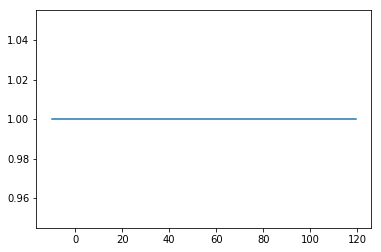

In [283]:
l = np.arange(-10,120,0.5)
h = np.ones(len(l))
plt.plot(l,h)

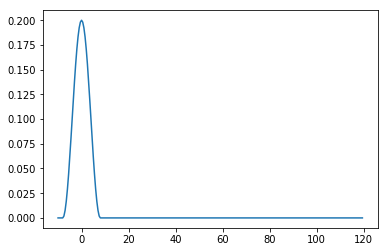

In [285]:
ola = eta(l,0,16)
plt.plot(l,ola)

In [287]:
arc = open('flat_results/last1/h','w')
np.savetxt(arc,np.c_[l,h])
arc.close()
arc = open('flat_results/last1/eta.in','w')
np.savetxt(arc,np.c_[l,ola])
arc.close()

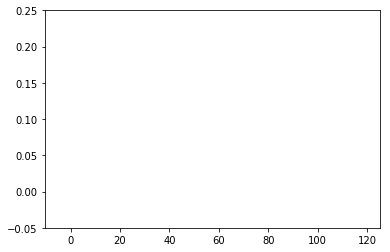

In [334]:
fig, ax = plt.subplots()

ax.set_xlim(( -10.5, 125))
ax.set_ylim((-0.05, 0.25))

line, = ax.plot([], [], lw=2)

In [335]:
def animate(i):
    num = str(i)
    a = np.loadtxt('flat_results/last1/eta'+num,unpack=True)
    line.set_data(a[0], a[1])
    return (line,)

In [336]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=np.arange(0,251,5),init_func=init, interval=150, blit=False)
HTML(anim.to_html5_video())

In [297]:
130/(np.sqrt(17)*0.5)


63.059262509446576

In [337]:
def animate(i):
    num = str(i)
    a = np.loadtxt('flat_results/last2/eta'+num,unpack=True)
    line.set_data(a[0], a[1])
    return (line,)

In [338]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=np.arange(0,251,5),init_func=init, interval=150, blit=False)
HTML(anim.to_html5_video())

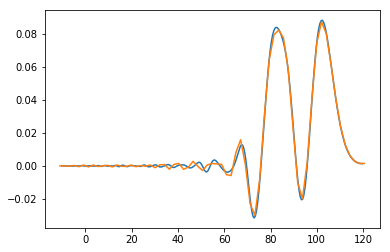

In [342]:
a = np.loadtxt('flat_results/last1/eta105',unpack=True)
plt.plot(a[0],a[1])
b = np.loadtxt('flat_results/last2/eta105',unpack=True)
plt.plot(b[0],b[1])

Because of the numearical dispersion relation.

Set $\kappa$ of the LSW numerical dispersion relation to $\frac{1}{6}$, then it will become similar to the Boussinesq physical dispersion relation. As a result, the waves look so similar.

$Co = 1$ for (i)  -> physical dispersion

$Co < 1$ for (ii) -> numerical dispersion


Let's get this $\sqrt{17}$ from setting $\kappa = \frac{1}{6}$.